<a href="https://colab.research.google.com/github/smmurdock/Learn-TensorFlow/blob/main/01_neural_network_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

**Example Regression Problems:**

* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I save each week for fuel?

**What we're going to cover:**

* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

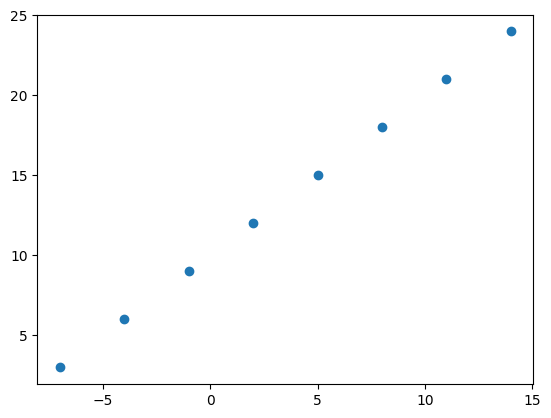

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# # Turn our NumPy arrays into tensors with dtype float32
# X = tf.constant(X)
# y = tf.constant(y)
# X, y

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

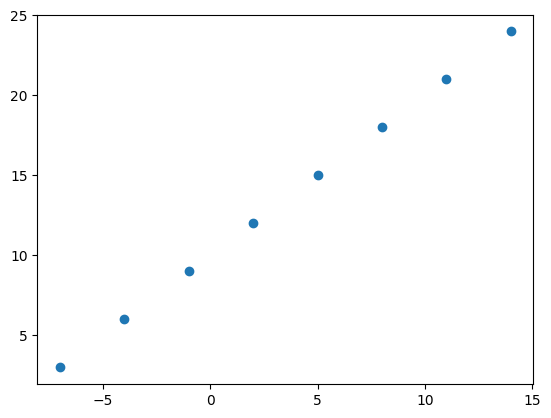

In [13]:
plt.scatter(X, y);

## Steps in Modeling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a neural network (if using a deep learning model).
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 20.8885 - mae: 20.8885
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 20.5144 - mae: 20.5144
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 20.2332 - mae: 20.2332
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 19.9519 - mae: 19.9519
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 19.6707 - mae: 19.6707


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


array([[-21.549088]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increasing the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

### Revised Steps in Modeling with TensorFlow
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  - **Loss** - how wrong your model's predictions are compared to the truth labels (you want to minimize this).
  - **Optimizer** - how your model should update its internal patterns to better its predictions.
  - **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns.
  - **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

In [17]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.1812 - mae: 11.1812
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 11.0487 - mae: 11.0487
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 10.9162 - mae: 10.9162
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 10.7837 - mae: 10.7837
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 10.6512 - mae: 10.6512
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 10.5187 - mae: 10.5187
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 10.3862 - mae: 10.3862
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 10.2537 - mae: 10.2537
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 10.1212 - mae: 10.1212
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 9.9887 - mae: 9.9887
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 9.8562 - mae: 9.8562
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 9.7237 - mae: 9.7237
Epoch 13/100
1/1 ━━━━━

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[29.937796]], dtype=float32)

In [20]:
# Exercise: Select and use one hyperparameter from the example model on the
# slide to modify and test with our existing model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # change made here
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - loss: 13.9098 - mae: 13.9098
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.4228 - mae: 13.4228
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.9535 - mae: 12.9535
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.4810 - mae: 12.4810
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.0027 - mae: 12.0027
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.5082 - mae: 11.5082
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.9964 - mae: 10.9964
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.4643 - mae: 10.4643
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.9004 - mae: 9.9004
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.3050 - mae: 9.3050
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.6733 - mae: 8.6733
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.0029 - mae: 8.0029
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [21]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[32.46969]], dtype=float32)

In [22]:
# Exercise: Select and use one hyperparameter from the example model on the
# slide to modify and test with our existing model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # change made here
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.5087 - mae: 11.5087
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.9038 - mae: 10.9038
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 10.2898 - mae: 10.2898
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 9.6635 - mae: 9.6635
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 9.0193 - mae: 9.0193
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 8.3520 - mae: 8.3520
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 7.6576 - mae: 7.6576
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.0148 - mae: 7.0148
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 6.9643 - mae: 6.9643
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 7.2065 - mae: 7.2065
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 7.3281 - mae: 7.3281
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 7.3506 - mae: 7.3506
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [23]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[25.943304]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

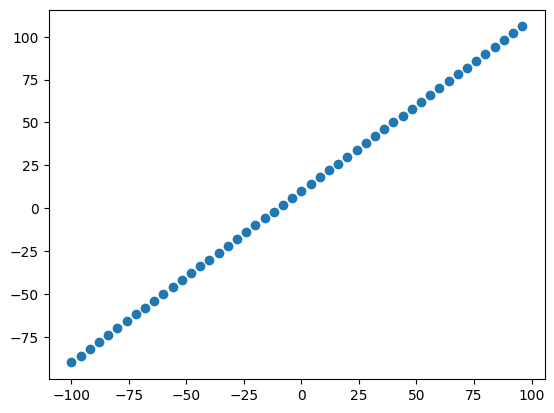

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data you have available. (not always used)
* **Test set** - the model gets evaluated on this data to test what it has learned, which is typically 10-15% of the total data you have available.

**Generalization** - the ability of a machine learning model to perform well on data it hasn't seen before.

In [27]:
# Check the length of how many samples we have
len(X)

50

**Note:** This is a small sample in the world of machine learning.

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that we've got our data in training and test sets, let's visualize it again.

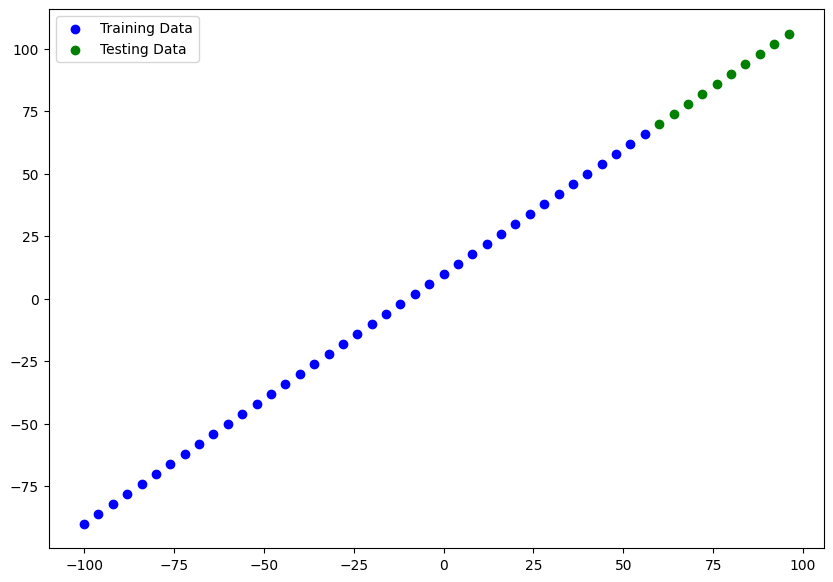

In [29]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network using our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 58.2111 - mae: 58.2111 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.7007 - mae: 23.7007
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9412 - mae: 11.9412
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.8451 - mae: 8.8451
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.3139 - mae: 10.3139
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1088 - mae: 12.1088
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.5898 - mae: 12.5898
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.0276 - mae: 8.0276
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7480 - mae: 9.7480
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.0097 - mae: 8.0097
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7364 - mae: 9.7364
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.1175 - mae: 8.1175
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

### Visualizing the model

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile a model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [34]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - the total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these paramters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=alfdI7S6wCY&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2)

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer. See how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [35]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

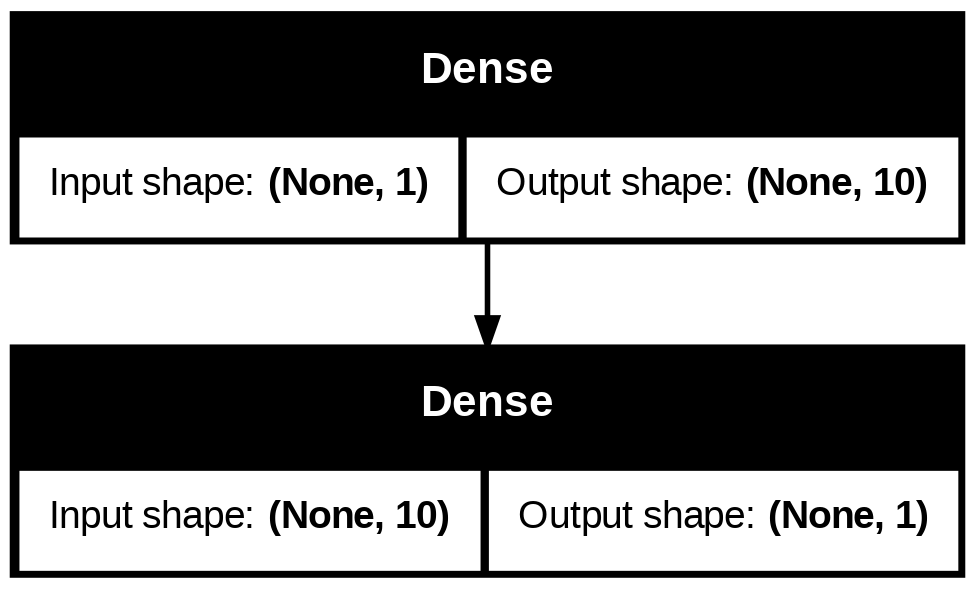

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often, you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[ 69.72496 ],
       [ 73.68609 ],
       [ 77.64722 ],
       [ 81.608345],
       [ 85.569466],
       [ 89.5306  ],
       [ 93.49172 ],
       [ 97.45285 ],
       [101.41398 ],
       [105.3751  ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     training_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, training_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data", alpha=0.7)
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions", alpha=0.7)
    # Show the legend
    plt.legend()
    plt.show()

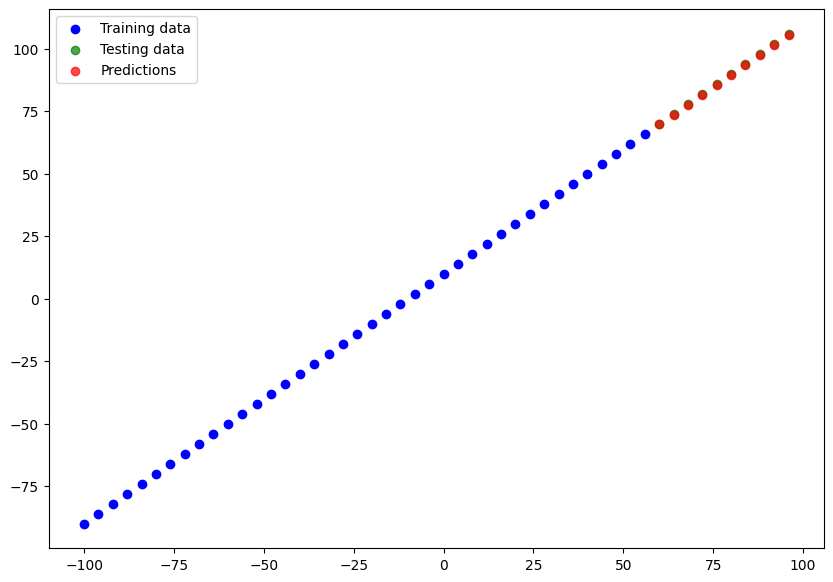

In [41]:
# Show the plot
plot_predictions(train_data=X_train,
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regreession, two of the main metrics:

* **MAE - mean absolute error** - on average, how wrong is each of my model's predictions
* **MSE - mean squared error** - square of the average errors


Metric Name | TensorFlow Code | When to use
:-- | :-- | :--
Mean Absolute Error (MAE) | `tf.keras.losses.MAE()` or `tf.metrics.MeanAbsoluteError()` | As a great starter metric for any regression problem.
Mean Square Error (MSE) | `tf.keras.losses.MSE()` or `tf.metrics.MeanSquaredError()` | When larger errors are more significant than smaller errors.
Huber | `tf.keras.losses.Huber()` | Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.4500 - mae: 0.4500


[0.4499672055244446, 0.4499672055244446]

In [43]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.27503967, 0.31391144, 0.3527832 , 0.39165497, 0.43053436,
       0.4693985 , 0.5082779 , 0.54714966, 0.5860214 , 0.6249008 ],
      dtype=float32)>

In [44]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.72496 ,  73.68609 ,  77.64722 ,  81.608345,  85.569466,
        89.5306  ,  93.49172 ,  97.45285 , 101.41398 , 105.3751  ],
      dtype=float32)>

In [45]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.4499672055244446>

In [46]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.21493729948997498>

In [47]:
mse = tf.keras.metrics.MeanSquaredError()
mse(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.21493729948997498>

In [48]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    metric = tf.metrics.MeanAbsoluteError()
    metric.update_state(y_true, tf.squeeze(y_pred))
    return metric

def mse(y_true, y_pred):
    metric = tf.metrics.MeanSquaredError()
    metric.update_state(y_true, tf.squeeze(y_pred))
    return metric

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...

In [49]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - the same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. `model_4` - 3 layers, trained for 100 epochs.
5. `model_5` - 3 layers, trained for 500 epochs.

#### Build `model_1`

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 52.9285 - mae: 52.9285 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 19.1197 - mae: 19.1197
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.4810 - mae: 12.4810
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.4235 - mae: 8.4235
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.1688 - mae: 9.1688
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2380 - mae: 8.2380
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.9079 - mae: 8.9079
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9558 - mae: 7.9558
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.5885 - mae: 9.5885
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.9380 - mae: 7.9380
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5769 - mae: 9.5769
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9202 - mae: 7.9202
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


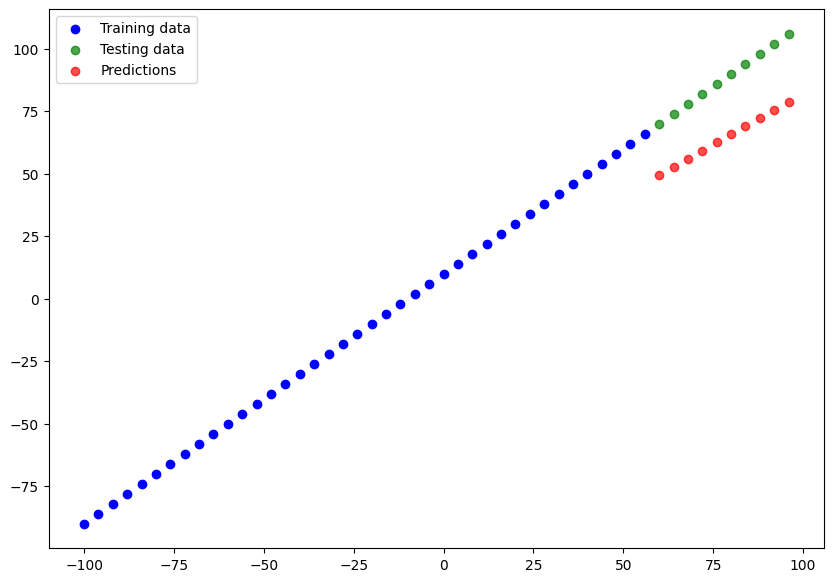

In [51]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1).result()
mse_1 = mse(y_test, y_preds_1).result()
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=23.87164306640625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=574.91748046875>)

#### Build `model_2`

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 51.1431 - mae: 51.1431 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 25.2486 - mae: 25.2486
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.8070 - mae: 23.8070
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 20.1218 - mae: 20.1218
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.3142 - mae: 18.3142
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1877 - mae: 12.1877
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.9829 - mae: 14.9829
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.6125 - mae: 15.6125
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5534 - mae: 11.5534
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.3757 - mae: 14.3757
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.9802 - mae: 10.9802
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.8036 - mae: 14.8036
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


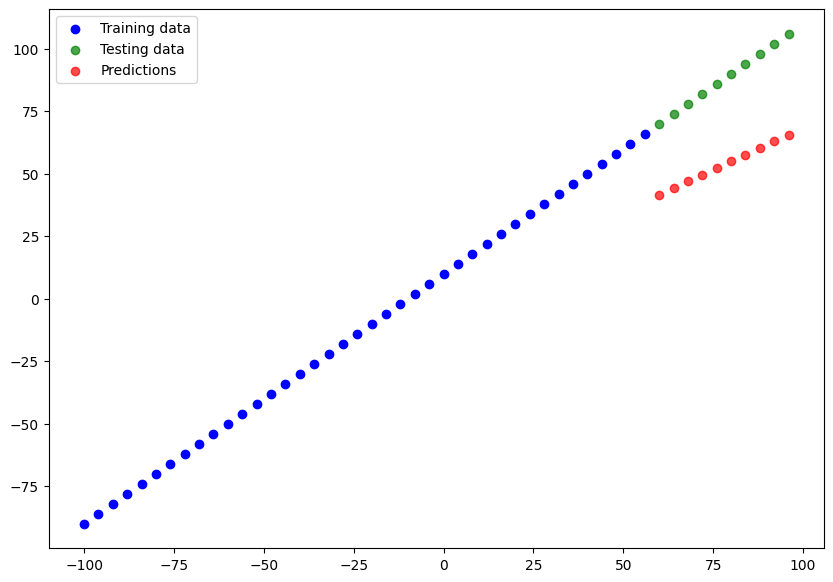

In [54]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_preds_2).result()
mse_2 = mse(y_test, y_preds_2).result()
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=34.34870529174805>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1194.4906005859375>)